In [2]:
import pandas as pd

df = pd.read_csv('data/fish.csv')

In [4]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [21]:
fish_target = df.loc[cond, ['Species']]
# fish_target

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

In [24]:
# test_target

In [26]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [27]:
kn.score(test_input, test_target['Species'])

1.0

In [29]:
kn.predict([[25, 150]])

C:\Users\1-03\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

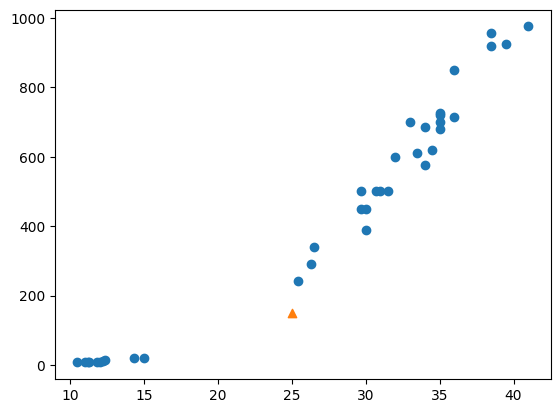

In [34]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^')

In [35]:
kn.kneighbors([[25, 150]])

C:\Users\1-03\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
         138.39320793]]),
 array([[11, 20,  5,  6,  1]]))

In [37]:
mean = train_input.mean()
std = train_input.std()
print(mean)
print(std)

Length2     27.305556
Weight     451.016667
dtype: float64
Length2     10.131449
Weight     324.863110
dtype: float64


In [40]:
train_scaled = (train_input - mean) / std

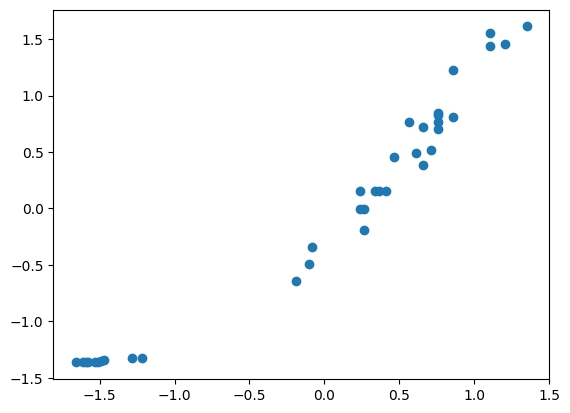

In [41]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])

In [42]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [43]:
test_scaled = (test_input - mean) / std

In [44]:
kn.score(test_scaled, test_target)

1.0

In [46]:
new = ([25, 150] - mean) / std

In [49]:
kn.predict([new])

C:\Users\1-03\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

## Penguins
- Adelie, Gentoo 구분하기

In [114]:

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [125]:
adelie_df = df.loc[df['species'] == 'Adelie']
adelie_depth = adelie_df['bill_depth_mm'].tolist()
adelie_weight = adelie_df['body_mass_g'].tolist()

gentoo_df = df.loc[df['species'] == 'Gentoo']
gentoo_depth = gentoo_df['bill_depth_mm'].tolist()
gentoo_weight = gentoo_df['body_mass_g'].tolist()

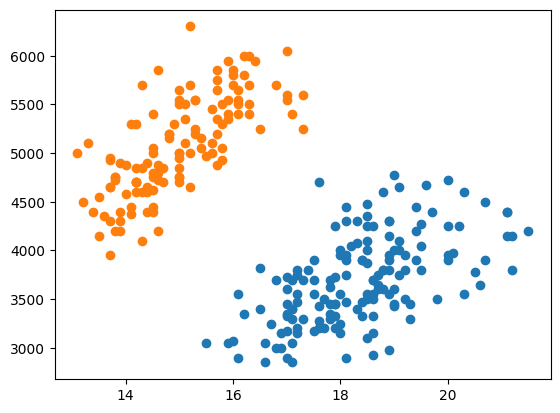

In [133]:
plt.scatter(adelie_depth, adelie_weight)
plt.scatter(gentoo_depth, gentoo_weight) 

In [136]:
depth = adelie_depth + gentoo_depth
weight = adelie_weight + gentoo_weight

In [138]:
penguins_data = [[d,w] for d, w in zip(depth, weight)]

In [139]:
penguins_target = [1] * len(adelie_depth) + [0] * len(gentoo_depth)

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [146]:
kn = KNeighborsClassifier()

In [149]:
penguins_df.dropna()
kn.fit(penguins_data, penguins_target)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [127]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
penguins_df = df.loc[cond, ['bill_depth_mm', 'body_mass_g']]
penguins_data = penguins_df.values.tolist()
# penguins_data

In [128]:
penguins_target = df.loc[cond, ['species']]

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
train_input, test_input, train_target, test_target = train_test_split(penguins_data, penguins_target)

In [132]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values